In [3]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('seed.csv', sep = ';')
data

,area,perimeter,compactness,length,width,coefficient,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [6]:
data = data[['coefficient', 'groove']]
data

,coefficient,groove
0,2.221,5.220
1,1.018,4.956
2,2.699,4.825
3,2.259,4.805
4,1.355,5.175
...,...,...
205,3.631,4.870
206,4.325,5.003
207,8.315,5.056
208,3.598,5.044


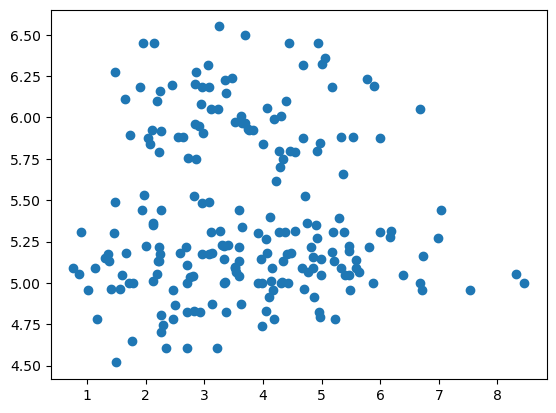

In [23]:
import matplotlib.pyplot as plt
plt.scatter(data.coefficient, data.groove)
plt.show()

In [9]:
x_array = np.array(data)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)

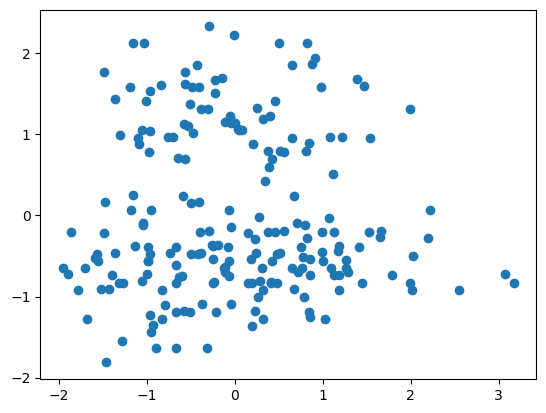

In [13]:
plt.scatter(x_scaled[:,0],x_scaled[:,1])
plt.show()

In [26]:
from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_scaled)

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [27]:
kmeans.cluster_centers_

array([[ 0.97513965, -0.55587342],
       [-0.08995649,  1.30460593],
       [-0.82780475, -0.66288286]])

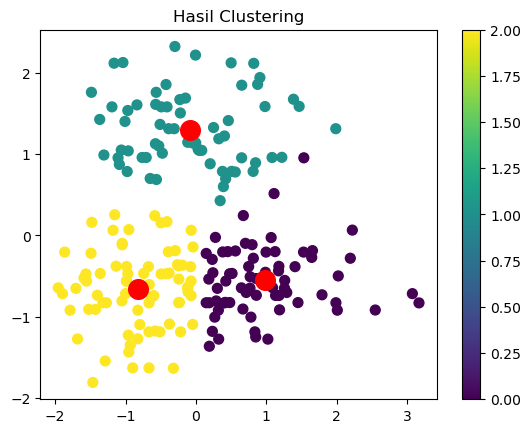

In [28]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 50, c = kmeans.labels_)
centers = kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c = 'red', s = 200)
plt.title('Hasil Clustering')
plt.colorbar(output)

In [30]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0])